### 다중회귀
- 단순회귀는 하나의 특성만 사용, 다항은 하나의 특성을 여러번 사용
- 다중은 여러 특성을 사용특성이 2개면 평면
- 특성이 3개 이상이면 표현이 어려움
- 여러 특성을 재곱 등 변형해서 새로운 특성을 만들어서 사용 (특성공학)

$y = ax_1 + bx_2 + c$ <br>
$y = ax_1^2 + dx_2^2 + ax_1+ dx_2 + (a+b)x_1x_2$<br>

### 추정기(Estimeator)
- Scikit-learn 라이브러리에서 모델 클래스를 추정기라고 함
- 지금사용하고 있는 LinearRegression은 추정기 이며 `sklern.linear_model.LinearRegression`으로 씀
- Estimeator은 일관되게 fit(), score(), predict() 제공

In [79]:
# 데이터 준비
import pandas as pd
import numpy as np
df = pd.read_csv('https://bit.ly/perch_csv')

# 넘파이 배열 만들기
perch_full = df.to_numpy()
perch_full
df
# 근데 굳이 넘파이 배열로 해야됨...? 걍 df[] 로해야지 -> 아 미친 target데이터셋을 또 따로 구함..

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
      115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
      150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
      218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
      556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
      850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
      1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
  perch_full, perch_weight, random_state =42)

# 다항 특성 만들기
# 사이킷런 전처리 클래스
from sklearn.preprocessing import PolynomialFeatures

'''
# poly test 하기
# 차수(degree = 2)
poly = PolynomialFeatures()

# 항상 fit 하고 transform()을 해야됨 - 두개를 합친게 fit_transform
# poly.fit([[2,3]])
# poly.transform([[2,3]])
poly.fit_transform([[2,3]])

# 1 (bias) 상수항 2,3,2**,2*3, 3**2 => ??????
# 2개의 특성을 가진 샘플 [2,3] 은 6개의 샘플로 변경된다 2, 3, 4(2의제곱), 9(3의제곱), 6(2*3)
# y = ax_1 + bx_2 + c
'''


#훈련, 테스트데이터 다항특성 만들기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print("행개수와 특성 개수", train_poly.shape)
poly.get_feature_names()

test_poly = poly.transform(test_input)

# 모델 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target), lr.score(test_poly,test_target)

# 이게 단순선형회귀(0.939846333997604, 0.8247503123313558), 다항선형회귀(0.9706807451768623 0.9775935108325123)보다 높음
# 0.99,0.97
# 근데 테스트셋이 좀 낮게 나와서 오버피팅임 -> 특성을 더 추가

행개수와 특성 개수 (42, 9)


(0.9903183436982125, 0.9714559911594155)

In [80]:
# 더 많은 특성 만들기
# 차수 높이기
poly = PolynomialFeatures(degree = 5 ,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print("특성개수",train_poly.shape)

lr.fit(train_poly,train_target)
lr.score(train_poly,train_target), lr.score(test_poly,test_target)

# train은 0.99인데 테스트는 -144로 오버피팅
# 오버피팅을 줄이는 규제와 일반화 필요

특성개수 (42, 55)


(0.9999999999938143, -144.40744532797535)

### 규제, 일반화, 정규화
<b>규제 및 일반화(Regularization)</b>
- 규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하게 훼방하는것 = <b>오버피팅 방지</b>
- 선형회귀면 특성에 곱해지는 계수(기울기와 가중치)의 크기를 작게 만듦
- 오버피팅인것은 모델을 이용하여 예측선을 시각화했을시에 데이터와 딱맞게 구불구불하게 그려진다는 말
  = 모델의 차수가 크다 (n차 함수로 갈수록 그래프가 많이 꺾임)
- 과적합을 막으려면 차수를 줄이면 된다

<b>표준화(Standardization)</b>
- 규제전에 표준화
- 선형회귀는 특성에 대해 스케일 조정(표준 점수화 - z score)의 필요성이 없었음
  하지만 규제의 경우 특정 스케일을 맞출 필요가 있음 - 표준화
- KNN 예제에서 표준점수로 변환 공식에 따라 변환
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해줌 = 서로다은 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고함
- 데이터가 각각이 평균이 0 이고 분산이 1이 가우시안분포(정규분포)값으로 변환
- Skleran의 transform 이용
- StandardScaler은 가우시안 정규 분포로 가질 수 있도록 데이터를 변환

In [81]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# 아 fit은 train으로만 하는것...멍청이 같이 하지 말기..
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# train_scaled = ss.fit_transform(train_poly)
# test_scaled = ss.fit_transform(test_poly)

### 릿지(Ridge) 회귀
- Ridege는 계수(가중치)를 제곱한 값을 기준으로 규제(벌칙)를 적용
- 일반적으로는 Ridge를 더 선호함
- Ridge에 규제 강도를 조정하는 인자값은 alpha(기본값은 1)
- `rideg = Ridge(alpha=1.5)`이런 식으로 하이퍼파라미터 alpha의 최적값을 찾는 과정이 있어야됨

In [82]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9896101671037343, 0.9790693977615386)

(0.9903815817570368, 0.9827976465386896)

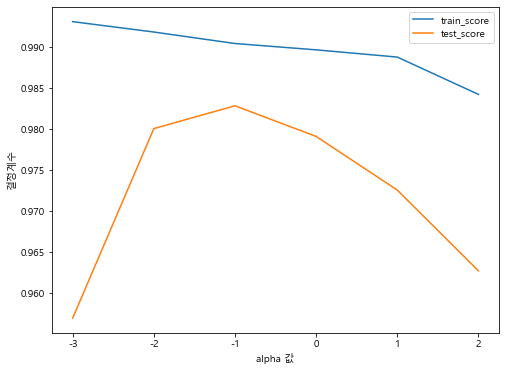

In [88]:
# 적절한 규제 강도 찾기 alpha값 찾기
# 수동으로  찾기 alpha 6개를 10배수로 하고 log 스케일로 변경
# 그래프를 출력하는데 x는 log10으로(작은 값음 촘촘 큰값은 넓어짐)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 스코어를 담을 빈 리스트 생성
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# 알파값을 변경하며 모델 생성하고 점수를 리스트에 넣기
for alpha in alpha_list : 
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.figure(figsize =(8,6))
plt.plot(np.log10(alpha_list), train_score, label = "train_score")
plt.plot(np.log10(alpha_list), test_score, label = "test_score")
plt.xlabel("alpha 값")
plt.ylabel("결정계수")
plt.legend()

# 보면 0,1일때 가장 좋다
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

### 하이퍼파라미터 튜닝(optimization 최적화)
- 많은 탐색 기법
- 확실한 정답이 없는 문제로 크게 분류하면 두가지 서로 다른 방법을 사용

<b>Babysitting one model(모델 돌보기)</b>
- 데이터는 방대하지만 cpu나 gpu 등 컴퓨터 자원이 많이 필요하지 않아서 적은 숫자의 모델을 한번에 학습시킬수 있을때 사용
- 성능을 잘 지켜보다가 학습 속도를 조금씩 바꾸는 방식으로 여러 모델을 동시에 학습시킬 컴퓨터의 자원이 충분하지 않을때 사용

<b>Training many models in parallel(여러 모델을 함께 학습)</b>
- 하이퍼파라미터를 며칠에 걸쳐 스스로 학습하게 함
- 여러 하이퍼파라미터 설정을 시험해볼 수 있고 마지막에 최고 성능을 보이는 것을 고름


### 라쏘(Lasso ) 회귀
- Ridge는 계수의(가중치)를 제곱한 값을 기준으로 규제를 적용한다면
- Lasso는 계수의(가중치)의 절대값을 기준으로 규제를 적용

C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\nono\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


(0.9888067471131867, 0.9824470598706695)

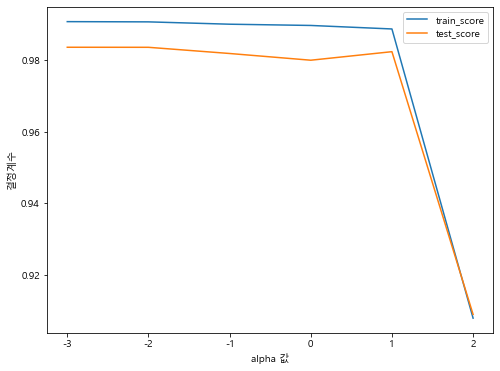

In [91]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

# 릿지와 동일하게 train와 test 점수를 그래프로 비교
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alpha_list :
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.figure(figsize =(8,6))
plt.plot(np.log10(alpha_list), train_score, label = "train_score")
plt.plot(np.log10(alpha_list), test_score, label = "test_score")
plt.xlabel("alpha 값")
plt.ylabel("결정계수")
plt.legend()

# 암튼 10에서 차이가 제일 적고 언더피팅이 안되니 10으로 alpha 값 설정
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)
